In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
df = pd.read_csv("/content/UNBER-1k.csv")
df

,reel_id,UnsafeType,Visual texts
0,www.facebook.com/reel/1000188341415358,Safe,Me on my way to watch Oppenheimer After Berbie
1,www.facebook.com/reel/1006146964533997,Safe,NaN
2,www.facebook.com/reel/1007123741459823,Adult,বান্ধবী আমার লাগানির পিনিকে আছে Love in love
3,www.facebook.com/reel/1007420607202244,Safe,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop
4,www.facebook.com/reel/1008519870870927,Safe,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং
...,...,...,...
1112,www.facebook.com/reel/946250977507282,Suicidal,কিছু কথা বাকি ছিল আর হয়তো কোনদিনও বলা হবে না
1113,www.facebook.com/reel/951238780033589,Suicidal,তোমাকে মন দিয়ে ভালোবাসতাম উপহার হিসাবে তোমার ক...
1114,www.facebook.com/reel/974520454682213,Suicidal,ওগো শুনছো একথা বলা মানুষটা আজ অন্য কারোর।
1115,www.facebook.com/reel/975204184253727,Suicidal,"মন দিয়ে ভালোবাসতে গেলাম, অবশেষে ধোকা পেলাম।"


In [4]:
df['UnsafeType'], uniques = pd.factorize(df['UnsafeType'])
uniques

Index(['Safe', 'Adult', 'Harmful', 'Suicidal'], dtype='object')

In [8]:
dir = "/content/drive/MyDrive/UNBER-1k/Extracted_Features"

In [6]:
X = []
y = []

In [9]:
reels = []

for file in os.listdir(dir):
    if file.endswith(".npy"):
        file_path = os.path.join(dir, file)
        features = np.load(file_path)
        file_path = file_path.replace(".npy", "")
        file_path = file_path.replace(".wav", "")
        file_path = file_path.replace("/content/drive/MyDrive/UNBER-1k/Extracted_Features/audio", "www.facebook.com/reel/")
        if file_path in df['reel_id'].values:
          index = df.index[df['reel_id'] == file_path].tolist()[0]
          unsafe_type = df.loc[index, 'UnsafeType']
          y.append(unsafe_type)
          X.append(features)

In [10]:
X = np.array(X, dtype=np.float32)

In [11]:
X.shape

(1111, 21160)

In [12]:
y = np.array(y)
y.shape

(1111,)

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
X = np.expand_dims(X, axis=-1)

In [15]:
X.shape

(1111, 21160, 1)

In [16]:
import numpy as np

combined = list(zip(X, y))

np.random.shuffle(combined)

X, y = zip(*combined)

X = np.array(X)
y = np.array(y)

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)

In [18]:
input_dim = X.shape[1]

In [19]:
encoding_dim = 32

In [20]:
input_layer = keras.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation="relu")(input_layer)
decoded = layers.Dense(input_dim, activation="sigmoid")(encoded)

In [21]:
autoencoder = keras.Model(input_layer, decoded)
encoder = keras.Model(input_layer, encoded)

In [22]:
autoencoder.compile(optimizer="adam", loss="mse")

In [23]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, validation_data=(X_test, X_test))

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.1161 - val_loss: 1.0090
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.8472 - val_loss: 0.9869
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.8140 - val_loss: 0.9716
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.8577 - val_loss: 0.9630
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.8432 - val_loss: 0.9616
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7650 - val_loss: 0.9548
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7835 - val_loss: 0.9530
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7500 - val_loss: 0.9485
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.8254 - val_loss: 0.9461
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.8420 - val_loss: 0.9456
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.8169 - val_loss: 0.9428
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.8

In [29]:
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)
X_val_encoded = encoder.predict(X_val)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [26]:
classifier = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(encoding_dim,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(4, activation="softmax")  # 4-class classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
classifier.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

In [30]:
classifier.fit(X_train_encoded, y_train, epochs=50, batch_size=16, validation_data=(X_val_encoded, y_val))

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3513 - loss: 6.6512 - val_accuracy: 0.2865 - val_loss: 6.3268
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3920 - loss: 4.2786 - val_accuracy: 0.3708 - val_loss: 5.8502
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3928 - loss: 3.8603 - val_accuracy: 0.3315 - val_loss: 5.3881
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4130 - loss: 2.9615 - val_accuracy: 0.3596 - val_loss: 4.8902
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4752 - loss: 2.5790 - val_accuracy: 0.3539 - val_loss: 4.6066
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4947 - loss: 2.3081 - val_accuracy: 0.3483 - val_loss: 4.5542
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4880 - loss: 2.1005 - val_accuracy: 0.3989 - val_loss: 4.3442
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5547 - loss: 1.6317 - val_accuracy: 0.3876 - val_loss:

In [31]:
y_pred = classifier.predict(X_test_encoded)
y_pred_classes = np.argmax(y_pred, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [32]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.41      0.39      0.40        18
           1       0.35      0.46      0.40        13
           2       0.33      0.22      0.27         9
           3       0.00      0.00      0.00         5

    accuracy                           0.33        45
   macro avg       0.27      0.27      0.27        45
weighted avg       0.33      0.33      0.33        45



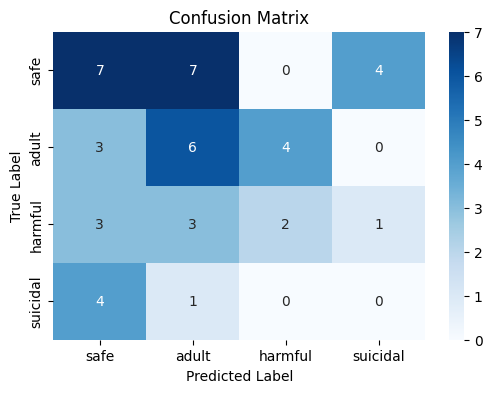

In [33]:
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["safe","adult","harmful","suicidal"], yticklabels=["safe","adult","harmful","suicidal"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.show()

In [34]:
model_path = "/content/drive/MyDrive/UNBER-1k/Models/AEclassifier.keras" # Specify a directory, not a file with extension
classifier.save(model_path)

In [35]:
# prompt: code to save encoder

model_path = "/content/drive/MyDrive/UNBER-1k/Models/AEencoder.keras"
encoder.save(model_path)